In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


## 1.What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like?






In [3]:
#Filtering columns
relevant_columns = ['ROUTE_ABBR', 'SCHEDULED_TIME', 'ACTUAL_ARRIVAL_TIME', 'ADHERENCE', 'HDWY_DEV','SCHEDULED_HDWY']
filtered_data = wego.loc[:, relevant_columns]


In [4]:
ontime_percentage = (wego['ADJUSTED_ONTIME_COUNT'].value_counts(normalize=True) * 100).round(2)

# '%' added
ontime_percentage_formatted = ontime_percentage.map("{:.2f}%".format)

# Results
print("Percentage of ADJUSTED_ONTIME_COUNT values:")
print(ontime_percentage_formatted)

Percentage of ADJUSTED_ONTIME_COUNT values:
ADJUSTED_ONTIME_COUNT
1    77.08%
0    22.92%
Name: proportion, dtype: object


In [5]:
#Uncleaned 
wego['HDWY_DEV_PCT'] = wego['HDWY_DEV'] / wego['SCHEDULED_HDWY']

In [6]:
#Cleaned PCT without inf and NaN's
wego['HDWY_DEV_PCT_C'] = wego['HDWY_DEV'] / wego['SCHEDULED_HDWY']

# Replace inf values with NaN
wego['HDWY_DEV_PCT_C'] = wego['HDWY_DEV_PCT_C'].replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN values
wego_cleaned = wego.dropna(subset=['HDWY_DEV_PCT_C'])

C:\Users\xiaht\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\xiaht\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


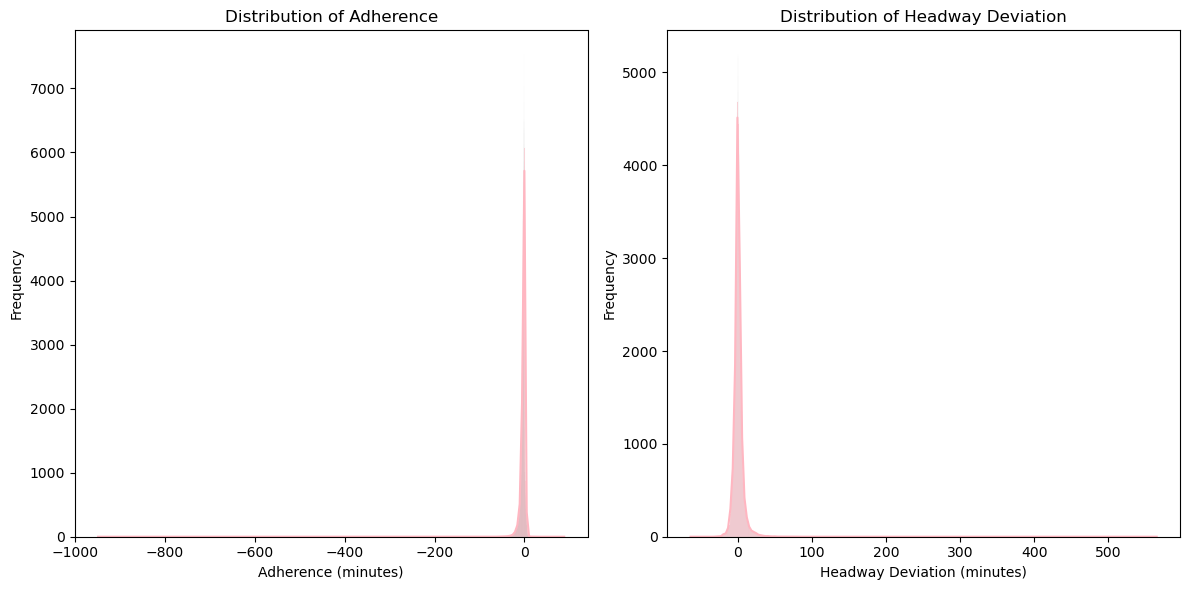

In [7]:
#Plots
plt.figure(figsize=(12, 6))

# Distribution of adherence
plt.subplot(1, 2, 1)
sns.histplot(filtered_data['ADHERENCE'], kde=True, color='lightpink')
plt.title('Distribution of Adherence')
plt.xlabel('Adherence (minutes)')
plt.ylabel('Frequency')


# Distribution of headway deviation
plt.subplot(1, 2, 2)
sns.histplot(filtered_data['HDWY_DEV'], kde=True, color='lightpink')
plt.title('Distribution of Headway Deviation')
plt.xlabel('Headway Deviation (minutes)')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

C:\Users\xiaht\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\xiaht\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


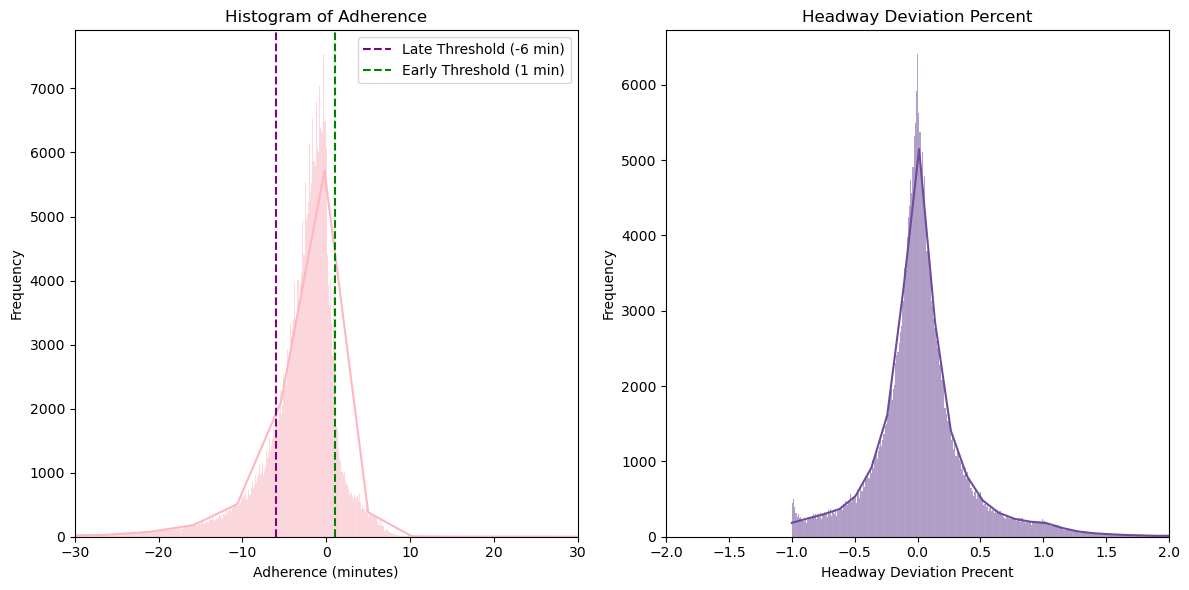

In [8]:
#Histograms with pretty lines
plt.figure(figsize=(12, 6))

#'ADHERENCE'
plt.subplot(1, 2, 1)
sns.histplot(filtered_data['ADHERENCE'], kde=True, color='lightpink')
plt.title('Histogram of Adherence')
plt.xlabel('Adherence (minutes)')
plt.ylabel('Frequency')
plt.axvline(x=-6, color='purple', linestyle='--', label='Late Threshold (-6 min)')  # Adding a line indicating late threshold
plt.axvline(x=1, color='green', linestyle='--', label='Early Threshold (1 min)')  # Addin a line indicating early threshold
plt.xlim(left=-30, right=30)
plt.legend()

#'HDWY_DEV' 
filtered_data['HDWY_DEV_PCT_C'] = filtered_data['HDWY_DEV'] / filtered_data['SCHEDULED_HDWY']
plt.subplot(1, 2, 2)
sns.histplot(filtered_data['HDWY_DEV_PCT_C'], kde=True, color='#6F4B9E')
plt.title('Headway Deviation Percent')
plt.xlabel('Headway Deviation Precent')
plt.ylabel('Frequency')
plt.xlim(left=-2, right=2)  


plt.tight_layout()
plt.show()

## 2. How does direction of travel, route, or location affect the headway and on-time performance?

In [9]:
grouped_abbr = wego.groupby('ROUTE_ABBR')

In [10]:
grouped_route = wego.groupby('ROUTE_DIRECTION_NAME')

In [11]:
statistics = grouped_abbr.agg({'HDWY_DEV_PCT_C': ['mean', 'std'], 'ADJUSTED_ONTIME_COUNT': 'mean'})

In [12]:
statistics

HDWY_DEV_PCT_C           ADJUSTED_ONTIME_COUNT
                     mean       std                  mean
ROUTE_ABBR                                               
3                0.056278  0.694458              0.731860
7                0.021907  0.334272              0.744314
22               0.033891  0.333710              0.866443
23               0.054504  0.450110              0.834450
50               0.012045  0.277422              0.838719
52               0.041635  0.445742              0.728227
55               0.025342  0.520386              0.679323
56               0.013182  0.387492              0.805748

In [13]:
# Group by 'ROUTE_DIRECTION_NAME' & 'ROUTE_ABBR'
grouped_route = wego.groupby(['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME'])

#Stats
statistic = grouped_route.agg({'HDWY_DEV_PCT_C': ['mean', 'std'], 'ADJUSTED_ONTIME_COUNT': 'mean'})

In [14]:
statistic

HDWY_DEV_PCT_C           ADJUSTED_ONTIME_COUNT
                                          mean       std                  mean
ROUTE_ABBR ROUTE_DIRECTION_NAME                                               
3          FROM DOWNTOWN              0.084821  0.926101              0.653150
           TO DOWNTOWN                0.027764  0.325067              0.811033
7          FROM DOWNTOWN              0.021202  0.340510              0.713336
           TO DOWNTOWN                0.022637  0.327726              0.776398
22         FROM DOWNTOWN              0.041202  0.378573              0.822229
           TO DOWNTOWN                0.025774  0.275281              0.913531
23         FROM DOWNTOWN              0.053438  0.454760              0.815242
           TO DOWNTOWN                0.056034  0.443366              0.863433
50         FROM DOWNTOWN              0.011373  0.293693              0.824358
           TO DOWNTOWN                0.012716  0.260155              0.852991
52         FROM DOWNTOWN              0.052448  0.506529              0.645627
           TO DOWNTOWN                0.029981  0.368853              0.817732
55         FROM DOWNTOWN              0.023171  0.553200              0.626135
           TO DOWNTOWN                0.027483  0.485855              0.731642
56         FROM DOWNTOWN              0.014636  0.427116              0.752563
           TO DOWNTOWN                0.011002  0.318996              0.880224

In [15]:
wego.query('TIME_POINT_ABBR == "SAMS"')[['TIME_POINT_ABBR', 'LATITUDE', 'LONGITUDE']]

,TIME_POINT_ABBR,LATITUDE,LONGITUDE
5009,SAMS,36.307973,-86.685963
5021,SAMS,36.307973,-86.685963
5033,SAMS,36.307973,-86.685963
5045,SAMS,36.307973,-86.685963
5057,SAMS,36.307973,-86.685963
...,...,...,...
350060,SAMS,36.307973,-86.685963
350072,SAMS,36.307973,-86.685963
350084,SAMS,36.307973,-86.685963
350096,SAMS,36.307973,-86.685963


In [16]:
grouped_time_points = wego.groupby('TIME_POINT_ABBR').agg({
    'LATITUDE': 'first',
    'LONGITUDE': 'first'
}).reset_index()

In [17]:
grouped_time_points

,TIME_POINT_ABBR,LATITUDE,LONGITUDE
0,21BK,36.138372,-86.800622
1,25ACLARK,36.186350,-86.816998
2,28&CHARL,36.153870,-86.818414
3,ARTS,36.131395,-86.740400
4,BRCJ,36.069342,-86.933604
...,...,...,...
56,WE23,36.148685,-86.804611
57,WE31,36.143233,-86.814581
58,WHBG,36.149179,-86.858044
59,WMRT,36.082032,-86.726914


In [18]:
grouped_time_point = wego.groupby('TIME_POINT_ABBR').agg(
    LATITUDE=('LATITUDE', 'mean'),
    LONGITUDE=('LONGITUDE', 'mean'),
    COUNT=('TIME_POINT_ABBR', 'size')
).reset_index().sort_values(by='COUNT', ascending=False)


print(grouped_time_point)

   TIME_POINT_ABBR   LATITUDE  LONGITUDE  COUNT
17        GXRVRGAT  36.300589 -86.695242  14954
11           DWMRT  36.244204 -86.760455  14085
58            WHBG  36.149700 -86.858298  11602
49         MXTHOMP  36.127660 -86.712306  10384
50         MXWHARF  36.148850 -86.762464  10382
..             ...        ...        ...    ...
21            HEAD  36.158659 -86.804683     73
27         MCC4_13  36.167091 -86.781923     72
37         MCC5_12  36.167091 -86.781923     43
41          MCC5_7  36.167091 -86.781923     36
7             CRES  36.194535 -86.837139     36

[61 rows x 4 columns]


In [19]:
#Adding column
wego['BUNCHING'] = np.where(wego['HDWY_DEV_PCT_C']<-0.5, 1, 0)

In [20]:
wego['GAPPING'] = np.where(wego['HDWY_DEV_PCT_C']>0.5, 1, 0)

In [21]:
#Adding column
wego['ACCEPTABLE_HDWY'] = np.where((wego['HDWY_DEV_PCT_C']>=-0.5) & (wego['HDWY_DEV_PCT_C']<=0.5), 1, 0)

In [22]:
wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_PCT,HDWY_DEV_PCT_C,BUNCHING,GAPPING,ACCEPTABLE_HDWY
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0.0,0,6.500000,NaN,NaN,NaN,0,0,0
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0.0,0,0.000000,NaN,NaN,NaN,0,0,0
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0.0,0,0.000000,NaN,NaN,NaN,0,0,0
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,NaN,0,0.000000,NaN,NaN,NaN,0,0,0
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,0,0.0,0,12.866666,5.0,NaN,NaN,0,0,0


In [23]:
wego.drop(columns=['ACCEPTING_HDWY'], inplace=True)

KeyError: "['ACCEPTING_HDWY'] not found in axis"

#John Micheals answer

For on time performace, route 22 (Bordeaux) is the most "on time" route, location MCC5_6 is the most "on time" location which is downtown around the wego central station, and going to downtown has a higher "on time" percentage than going from downtown.

## 3. How does time of day or day of week affect headway and on-time performance?


SERVICE_ABBR: 1 = Weekday, 2 = Saturday, 3 = Sunday.

In [24]:
#Converting columns into date & time
wego['SCHEDULED_TIME'] = pd.to_datetime(wego['SCHEDULED_TIME'])
wego['ACTUAL_ARRIVAL_TIME'] = pd.to_datetime(wego['ACTUAL_ARRIVAL_TIME'])
wego['ACTUAL_DEPARTURE_TIME'] = pd.to_datetime(wego['ACTUAL_DEPARTURE_TIME'])
wego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   CALENDAR_ID                350329 non-null  int64         
 1   SERVICE_ABBR               350329 non-null  int64         
 2   ADHERENCE_ID               350329 non-null  int64         
 3   DATE                       350329 non-null  object        
 4   ROUTE_ABBR                 350329 non-null  int64         
 5   BLOCK_ABBR                 350329 non-null  int64         
 6   OPERATOR                   350329 non-null  int64         
 7   TRIP_ID                    350329 non-null  int64         
 8   OVERLOAD_ID                350329 non-null  int64         
 9   ROUTE_DIRECTION_NAME       350329 non-null  object        
 10  TIME_POINT_ABBR            350329 non-null  object        
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64 

In [25]:
wego.groupby('DAY_OF_WEEK')[['ADJUSTED_ONTIME_COUNT', 'ADJUSTED_EARLY_COUNT',
     'ADJUSTED_LATE_COUNT']].mean().sort_values('ADJUSTED_ONTIME_COUNT')

KeyError: 'DAY_OF_WEEK'

In [33]:
wego.groupby('ROUTE_ABBR')[['ADHERENCE', 'HDWY_DEV']].describe()

ADHERENCE                                                      \
               count      mean       std         min       25%       50%   
ROUTE_ABBR                                                                 
3            45488.0 -3.761491  5.415910 -133.250000 -5.350000 -2.566666   
7            17267.0 -3.346555  6.669753  -87.716666 -4.916666 -2.116666   
22           25188.0 -1.138107  6.391798 -675.000000 -2.950000 -0.933333   
23           39653.0 -1.760110  7.680491 -618.166666 -3.116666 -1.316666   
50           42629.0 -2.505022  6.159666 -489.316666 -3.883333 -1.800000   
52           49327.0 -3.971342  8.721732 -948.533333 -5.016666 -2.066666   
55           60359.0 -4.823302  7.535092 -375.233333 -6.583333 -2.883333   
56           58950.0 -2.703988  4.931009 -322.783333 -4.300000 -1.900000   

                                HDWY_DEV                                  \
                 75%        max    count      mean        std        min   
ROUTE_ABBR                                                                 
3          -0.766666  33.750000  36583.0  0.580907   6.203530 -64.000000   
7          -0.616666  88.383333  11578.0  0.336808   5.909983 -30.433334   
22          0.816666  24.733333  17007.0  0.955867  10.248444 -43.650000   
23          0.033333  33.633333  28478.0  1.053563   9.881327 -32.116667   
50         -0.300000  22.350000  34593.0  0.212376   4.760558 -33.250000   
52         -0.400000  30.200000  39887.0  0.974776   9.185015 -55.533334   
55         -0.850000  40.250000  49432.0  0.261038   6.364978 -29.933334   
56         -0.283333  39.916666  48335.0  0.149213   4.714435 -27.266667   

                                                      
                 25%       50%       75%         max  
ROUTE_ABBR                                            
3          -2.450000  0.116666  2.800000   76.866666  
7          -1.983334  0.033333  2.133333   50.250000  
22         -1.966667  0.050000  2.200000  508.700000  
23         -1.733334  0.066666  2.066666  565.433333  
50         -2.083334  0.033333  2.183333   54.283333  
52         -2.450000  0.083333  2.783333  472.366666  
55         -3.150000 -0.033334  2.983333  102.000000  
56         -2.333334  0.000000  2.383333  166.000000

In [34]:
# Extract hour of the day and day of the week
wego['HOUR_OF_DAY'] = wego['SCHEDULED_TIME'].dt.hour
wego['DAY_OF_WEEK'] = wego['SCHEDULED_TIME'].dt.day_name() 

# Extract hour of the day and day of the week from ACTUAL_ARRIVAL_TIME
wego['ACTUAL_HOUR_OF_DAY'] = wego['ACTUAL_DEPARTURE_TIME'].dt.hour
wego['ACTUAL_DAY_OF_WEEK'] = wego['ACTUAL_DEPARTURE_TIME'].dt.day_name()  

In [35]:
# Group by HOUR_OF_DAY 
scheduled_hourly_stats = wego.groupby('HOUR_OF_DAY').agg({
    'HDWY_DEV_PCT_C': 'mean',
    'ADJUSTED_ONTIME_COUNT': 'mean'
}).reset_index()

#Column
scheduled_hourly_stats.columns = ['HOUR_OF_DAY', 'HDWY_DEV_PCT_C_MEAN_SCHEDULED', 'ONTIME_PERCENTAGE_MEAN_SCHEDULED']


# Group by ACTUAL HOUR_OF_DAY and calculate statistics
actual_hourly_stats = wego.groupby('ACTUAL_HOUR_OF_DAY').agg({
    'HDWY_DEV_PCT_C': 'mean',
    'ADJUSTED_ONTIME_COUNT': 'mean'
}).reset_index()
actual_hourly_stats.columns = ['ACTUAL_HOUR_OF_DAY', 'HDWY_DEV_PCT_C_MEAN_ACTUAL','ONTIME_PERCENTAGE_MEAN_ACTUAL']

actual_hourly_stats
scheduled_hourly_stats

,HOUR_OF_DAY,HDWY_DEV_PCT_C_MEAN_SCHEDULED,ONTIME_PERCENTAGE_MEAN_SCHEDULED
0,0,0.009532,0.680171
1,1,-0.015873,0.463415
2,4,-0.028083,0.917053
3,5,0.026805,0.886967
4,6,0.029317,0.868819
5,7,0.055280,0.784093
6,8,0.016025,0.733465
7,9,0.012254,0.812971
8,10,0.014958,0.834594
9,11,0.024560,0.837398


In [36]:
# Group by SCHEDULED DAY_OF_WEEK and calculate statistics
scheduled_weekly_stats = wego.groupby('DAY_OF_WEEK').agg({
    'HDWY_DEV_PCT_C': 'mean',
    'ADJUSTED_ONTIME_COUNT': 'mean'
}).reset_index()

#Columns
scheduled_weekly_stats.columns = ['DAY_OF_WEEK', 'HDWY_DEV_PCT_C_MEAN_SCHEDULED', 'ONTIME_PERCENTAGE_MEAN_SCHEDULED']


# Group by ACTUAL DAY_OF_WEEK and calculate statistics
actual_weekly_stats = wego.groupby('ACTUAL_DAY_OF_WEEK').agg({
    'HDWY_DEV_PCT_C': 'mean',
    'ADJUSTED_ONTIME_COUNT': 'mean'
}).reset_index()
actual_weekly_stats.columns = ['ACTUAL_DAY_OF_WEEK', 'HDWY_DEV_PCT_C_MEAN_ACTUAL', 'ONTIME_PERCENTAGE_MEAN_ACTUAL']

print(scheduled_weekly_stats)
print(actual_weekly_stats)

  DAY_OF_WEEK  HDWY_DEV_PCT_C_MEAN_SCHEDULED  ONTIME_PERCENTAGE_MEAN_SCHEDULED
0      Friday                       0.042787                          0.722060
1      Monday                       0.022874                          0.820784
2    Saturday                       0.023550                          0.773930
3      Sunday                       0.036036                          0.802445
4    Thursday                       0.037819                          0.753738
5     Tuesday                       0.028584                          0.779063
6   Wednesday                       0.027769                          0.768539
  ACTUAL_DAY_OF_WEEK  HDWY_DEV_PCT_C_MEAN_ACTUAL  \
0             Friday                    0.042512   
1             Monday                    0.022590   
2           Saturday                    0.022691   
3             Sunday                    0.038057   
4           Thursday                    0.037185   
5            Tuesday                    0.028962   
6   

C:\Users\xiaht\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\xiaht\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\xiaht\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\xiaht\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

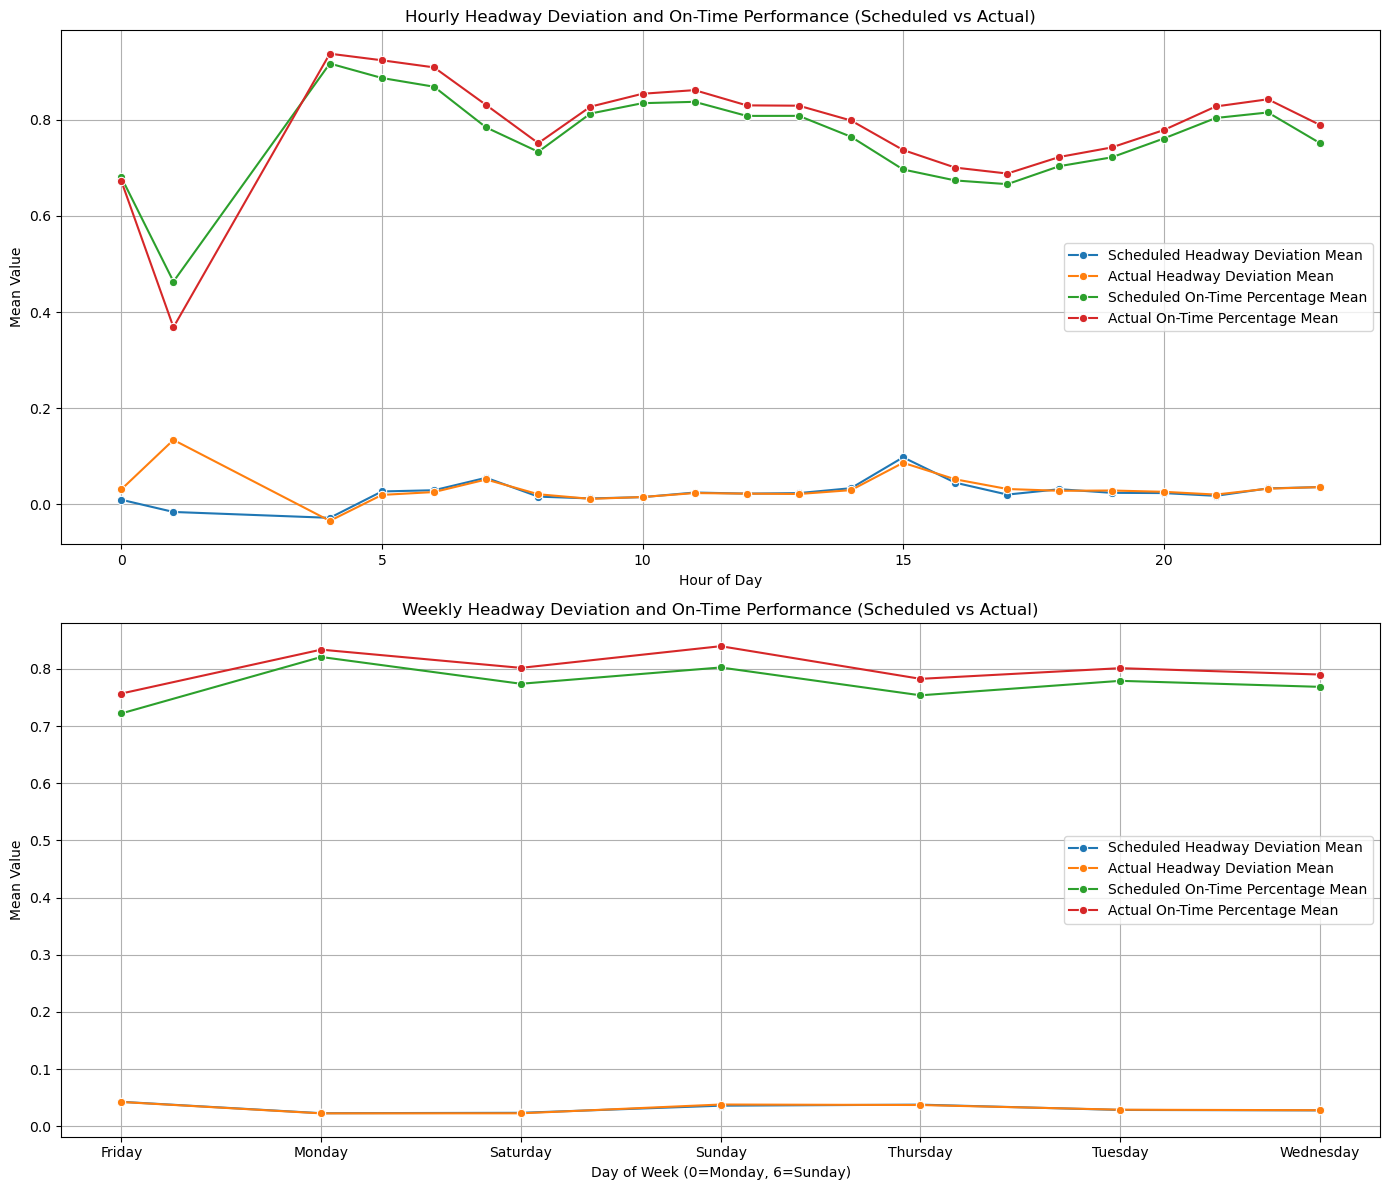

In [37]:

plt.figure(figsize=(14, 12))

# Plot for Scheduled vs Actual Hourly Statistics
plt.subplot(2, 1, 1)
sns.lineplot(data=scheduled_hourly_stats, x='HOUR_OF_DAY', y='HDWY_DEV_PCT_C_MEAN_SCHEDULED', label='Scheduled Headway Deviation Mean', marker='o')
sns.lineplot(data=actual_hourly_stats, x='ACTUAL_HOUR_OF_DAY', y='HDWY_DEV_PCT_C_MEAN_ACTUAL', label='Actual Headway Deviation Mean', marker='o')
sns.lineplot(data=scheduled_hourly_stats, x='HOUR_OF_DAY', y='ONTIME_PERCENTAGE_MEAN_SCHEDULED', label='Scheduled On-Time Percentage Mean', marker='o')
sns.lineplot(data=actual_hourly_stats, x='ACTUAL_HOUR_OF_DAY', y='ONTIME_PERCENTAGE_MEAN_ACTUAL', label='Actual On-Time Percentage Mean', marker='o')
plt.title('Hourly Headway Deviation and On-Time Performance (Scheduled vs Actual)')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Value')
plt.legend()
plt.grid(True)

# Plot for Scheduled vs Actual Weekly Statistics
plt.subplot(2, 1, 2)
sns.lineplot(data=scheduled_weekly_stats, x='DAY_OF_WEEK', y='HDWY_DEV_PCT_C_MEAN_SCHEDULED', label='Scheduled Headway Deviation Mean', marker='o')
sns.lineplot(data=actual_weekly_stats, x='ACTUAL_DAY_OF_WEEK', y='HDWY_DEV_PCT_C_MEAN_ACTUAL', label='Actual Headway Deviation Mean', marker='o')
sns.lineplot(data=scheduled_weekly_stats, x='DAY_OF_WEEK', y='ONTIME_PERCENTAGE_MEAN_SCHEDULED', label='Scheduled On-Time Percentage Mean', marker='o')
sns.lineplot(data=actual_weekly_stats, x='ACTUAL_DAY_OF_WEEK', y='ONTIME_PERCENTAGE_MEAN_ACTUAL', label='Actual On-Time Percentage Mean', marker='o')
plt.title('Weekly Headway Deviation and On-Time Performance (Scheduled vs Actual)')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Mean Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

4. How much of a factor does the driver have on headway and on-time performance? The driver is indicated by the OPERATOR variable.

In [28]:
grouped_operator = wego.groupby('OPERATOR').agg({
    'HDWY_DEV_PCT':'mean',
    'ADHERENCE': 'mean',
    'ADJUSTED_ONTIME_COUNT': 'mean'
}).reset_index()

# Rename columns 
grouped_operator.columns = ['OPERATOR', 'HDWY_DEV_PCT_MEAN', 'ADHERENCE_MEAN', 'ONTIME_PERCENTAGE_MEAN']

# Display the first few rows 
print(grouped_operator.head(10))

   OPERATOR  HDWY_DEV_PCT_MEAN  ADHERENCE_MEAN  ONTIME_PERCENTAGE_MEAN
0         0                NaN        8.916666                1.000000
1        56          -0.025000       -1.138889                1.000000
2       235           0.190201       -3.947222                0.500000
3       244          -0.002099       -3.466666                0.800000
4       301           0.283222       -4.971171                0.513514
5       304           0.097810       -2.872886                0.882112
6       326           0.117660       -4.351053                0.735335
7       329          -0.179184       -2.314510                0.853587
8       332           0.111139       -4.296523                0.735948
9       341           0.031118       -1.791645                0.777607


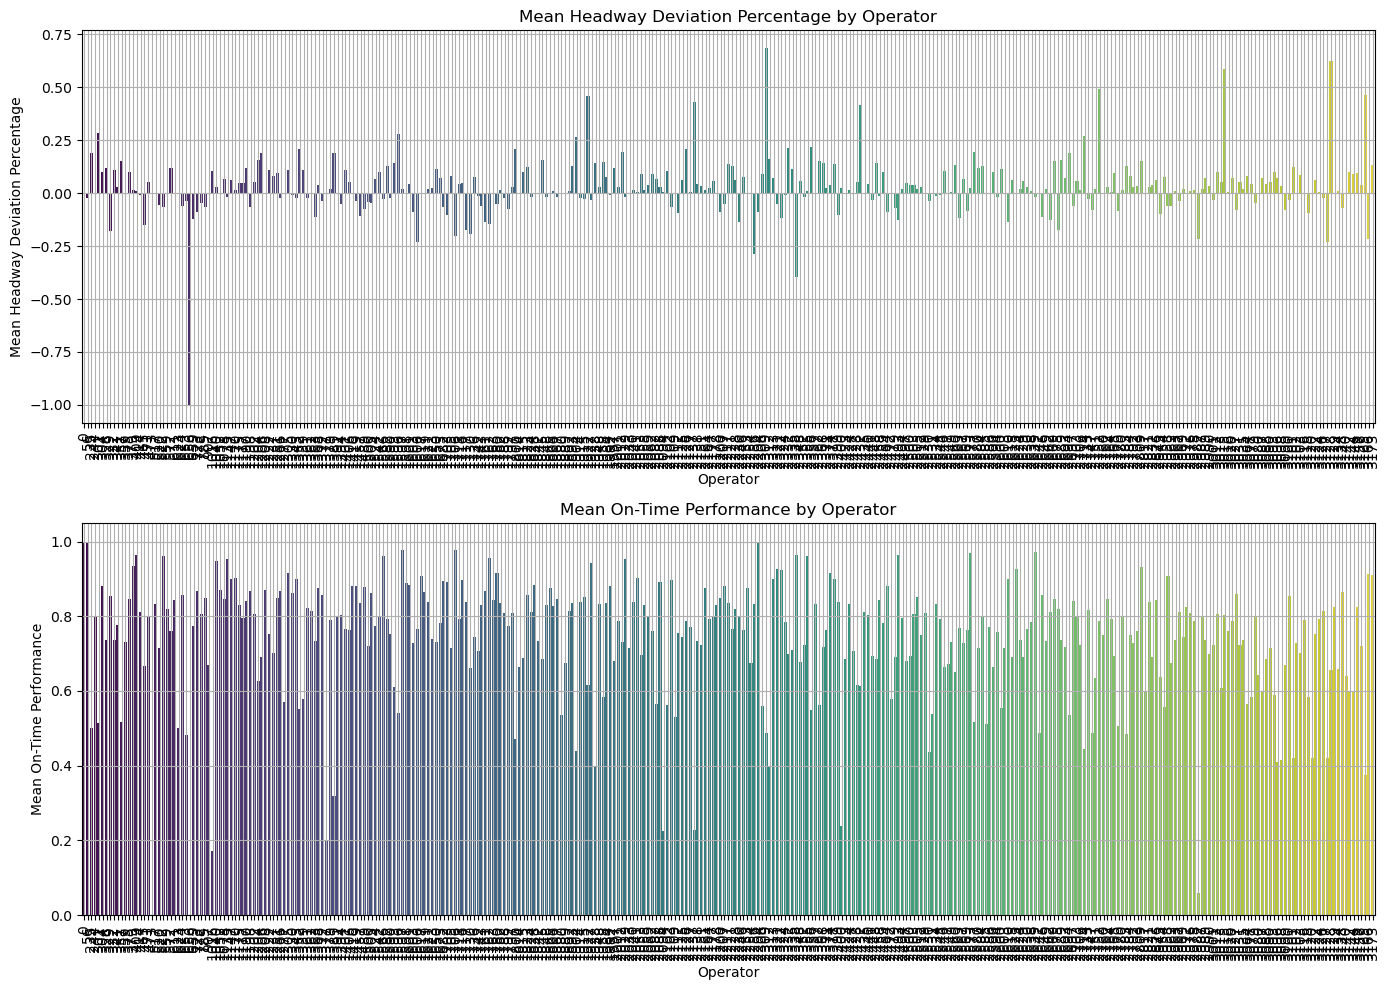

In [29]:
# The figure
plt.figure(figsize=(14, 10))

# Plot Headway Deviation Percentage Mean
plt.subplot(2, 1, 1)
sns.barplot(x='OPERATOR', y='HDWY_DEV_PCT_MEAN', data=grouped_operator, palette='viridis')
plt.title('Mean Headway Deviation Percentage by Operator')
plt.xlabel('Operator')
plt.ylabel('Mean Headway Deviation Percentage')
plt.xticks(rotation=90)
plt.grid(True)

# Plot On-Time Performance Mean
plt.subplot(2, 1, 2)
sns.barplot(x='OPERATOR', y='ONTIME_PERCENTAGE_MEAN', data=grouped_operator, palette='viridis')
plt.title('Mean On-Time Performance by Operator')
plt.xlabel('Operator')
plt.ylabel('Mean On-Time Performance')
plt.xticks(rotation=90)
plt.grid(True)

plt.tight_layout()
plt.show()


In [30]:
# Group data by operator and calculate the mean 
grouped_operator = wego.groupby('OPERATOR').agg({
    'HDWY_DEV_PCT': 'mean',
    'ADHERENCE': 'mean',
    'ADJUSTED_ONTIME_COUNT': 'mean'
}).reset_index()

# Rename columns 
grouped_operator.columns = ['OPERATOR', 'HDWY_DEV_PCT_MEAN', 'ADHERENCE_MEAN', 'ONTIME_PERCENTAGE_MEAN']

# Sort by on-time performance and select the top 10 operators
top_operators = grouped_operator.sort_values(by='ONTIME_PERCENTAGE_MEAN', ascending=False).head(10)

# Display 
print(top_operators.head())

     OPERATOR  HDWY_DEV_PCT_MEAN  ADHERENCE_MEAN  ONTIME_PERCENTAGE_MEAN
0           0                NaN        8.916666                1.000000
1          56          -0.025000       -1.138889                1.000000
178      2294          -0.090828       -0.280000                1.000000
98       1706          -0.200123       -0.687879                0.977273
84       1597           0.017928       -0.963114                0.976744


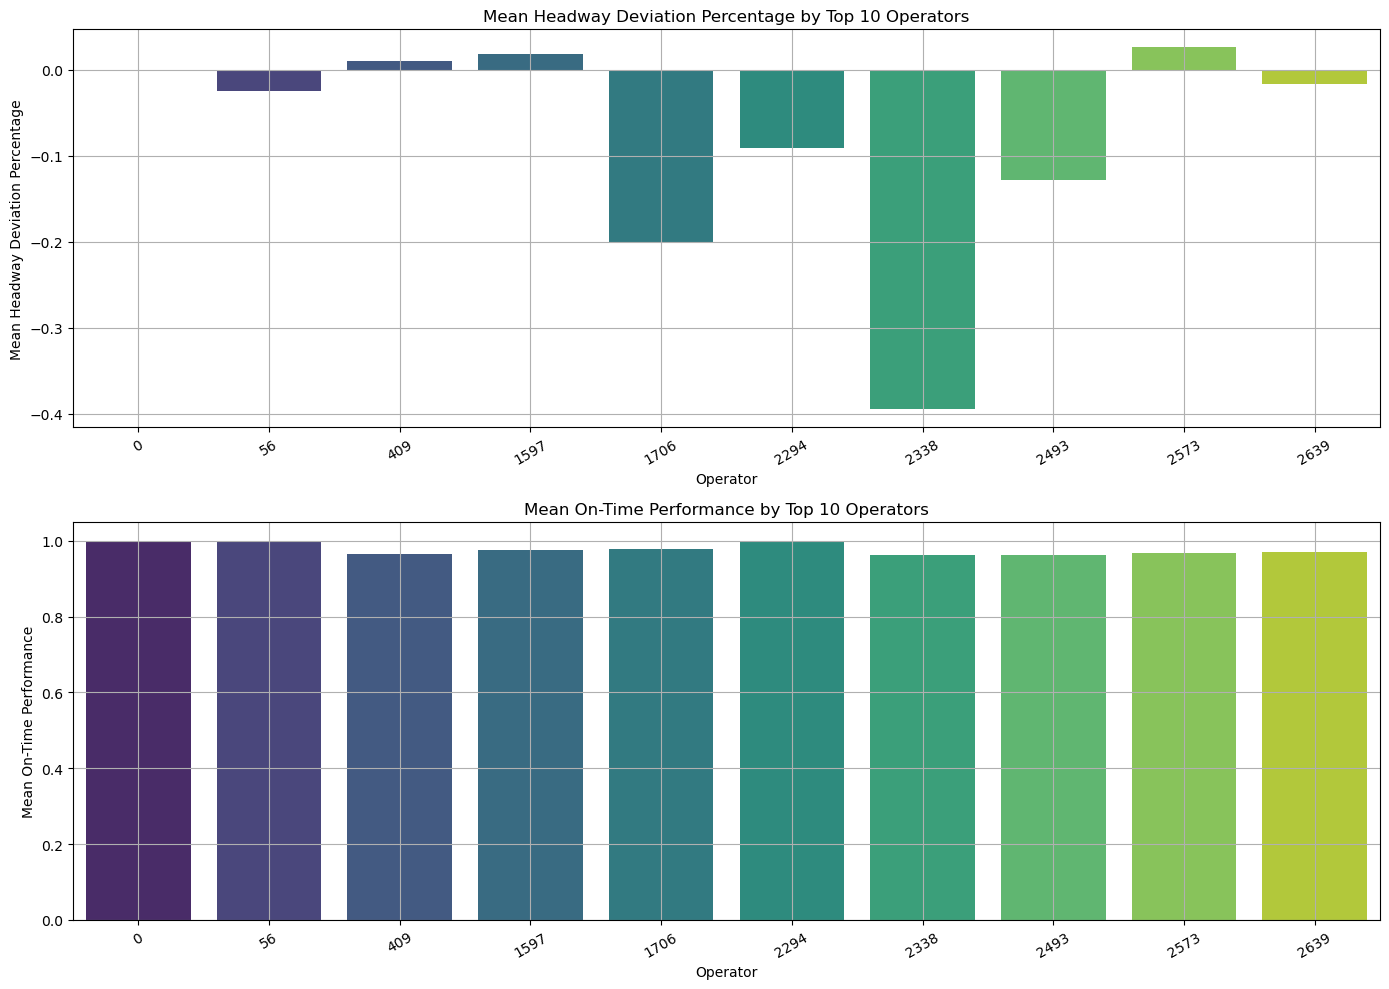

In [31]:
# Set up the figure
plt.figure(figsize=(14, 10))

# Plot Headway Deviation Percentage Mean for top 10 operators
plt.subplot(2, 1, 1)
sns.barplot(x='OPERATOR', y='HDWY_DEV_PCT_MEAN', data=top_operators, palette='viridis')
plt.title('Mean Headway Deviation Percentage by Top 10 Operators')
plt.xlabel('Operator')
plt.ylabel('Mean Headway Deviation Percentage')
plt.xticks(rotation=30)
plt.grid(True)

# Plot On-Time Performance Mean for top 10 operators
plt.subplot(2, 1, 2)
sns.barplot(x='OPERATOR', y='ONTIME_PERCENTAGE_MEAN', data=top_operators, palette='viridis')
plt.title('Mean On-Time Performance by Top 10 Operators')
plt.xlabel('Operator')
plt.ylabel('Mean On-Time Performance')
plt.xticks(rotation=30)
plt.grid(True)

plt.tight_layout()
plt.show()

5. Is there any relationship between lateness (ADHERENCE) and headway deviation?

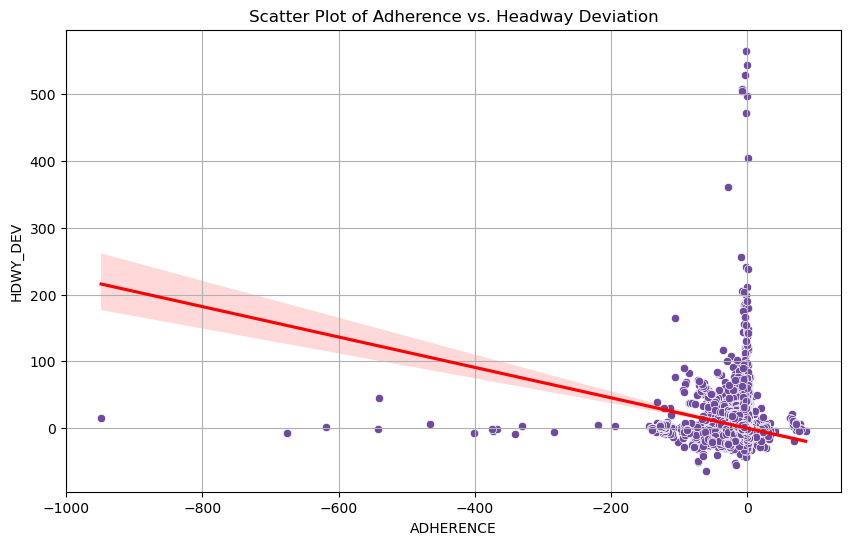

In [32]:
# Set up the figure
plt.figure(figsize=(10, 6))

# Scatter plot of ADHERENCE vs. HDWY_DEV
sns.scatterplot(x='ADHERENCE', y='HDWY_DEV', data=wego, color='#6F4B9E')
plt.title('Scatter Plot of Adherence vs. Headway Deviation')
plt.xlabel('Adherence (minutes)')
plt.ylabel('Headway Deviation (minutes)')


# Regression line
sns.regplot(x='ADHERENCE', y='HDWY_DEV', data=filtered_data, scatter=False, color='red')

plt.grid(True)
plt.show()